# Report of the paper

This paper present a new machine learning technique aiming to conbined estimators in a unsual way. 

For now, most of the technique use a linear combination (or convex combination) to create a new estimator. 

Here the idea is to combine those estimators in a model-free, data dependant and non linear way. 

Here we introduce different notation:
- $\mathscr{D}_n=\left\{\left(\mathbf{X}_1, Y_1\right), \ldots,\left(\mathbf{X}_n, Y_n\right)\right\}$ represent the training set (implemented in the class `Dataset()`)
- $M$ is the number of basic machines (represented by the attribut `self.nb_machine` in the `COBRA()` class. 
- $\mathscr{R} = \{r_1, \ldots, r_M\}$ is the set of the basic machines. (represented by the attribut `self.machines` in the class `COBRA()` and each basic machine is a object of the class `Machine()`)
- $\epsilon_\ell$ is the threshold in the definition of the $T_n$ estimator (equation 1 bellow). (represented by the attribut `self.epsilon` in the `COBRA()` class.  
- $\alpha \in \left[\frac{1}{M},\frac{2}{M},\ldots,1\right]$ is define as the proportion of machine that need to agree to keep $Y_i$ in the equation 1. (represented by the attribut `self.alpha` in the `COBRA()` class.


### The COBRA algorithm

The algorithm work as follow:
1. Split $\mathscr{D}_n$ in 2:
  - $\mathscr{D}_{k}=\left\{\left(\mathbf{X}_1, Y_1\right), \ldots,\left(\mathbf{X}_k, Y_k\right)\right\}$ $\rightarrow$ The part of the dataset use for training the basic machine.
  - $\mathscr{D}_{\ell}=\left\{\left(\mathbf{X}_{k+1}, Y_{k+1}\right), \ldots,\left(\mathbf{X}_n, Y_n\right)\right\} $$\rightarrow$ The part of the dataset use for training COBRA it self.

  the splitting ratio is the atribut `self.ratio`in the `COBRA()`class. it is set to be 0.5 by default. It is and hyperparamater that should be optimize, nevertheless, it is not the most important one. To split the dataset, we can use the method `split()` in the class `Dataset()`
2. Train all the basic machine on $\mathscr{D}_{k}$. It is done with the method `self.train()` of the `COBRA()` class.
The next step is to train the combined estimator $T_n$define by this equation:
\begin{equation}
\tag{1}
T_n\left(\mathbf{r}_k(\mathbf{x})\right)=\sum_{i=1}^{\ell} W_{n, i}(\mathbf{x}) Y_i
\end{equation}
where : 
\begin{equation}
\tag{2}
W_{n, i}(\mathbf{x})=\frac{\mathbf{1}_{\bigcap_{m=1}^M\left\{\left|r_{k, m}(\mathbf{x})-r_{k, m}\left(\mathbf{x}_i\right)\right| \leq \varepsilon_{\ell}\right\}}}{\sum_{j=1}^{\ell} \mathbf{1}_{\bigcap_{m=1}^M\left\{\left|r_{k, m}(\mathbf{x})-r_{k, m}\left(\mathbf{x}_j\right)\right| \leq \varepsilon_{\ell}\right\}}}
\end{equation}
ou (si $\alpha \neq 1$):
\begin{equation}
\tag{3}
W_{n, i}(\mathbf{x})=\frac{\mathbf{1}_{\left\{\sum_{m=1}^M \mathbf{1}_{\left\{\left|r_{k, m}(\mathbf{x})-r_{k, m}\left(\mathbf{x}_i\right)\right| \leq \varepsilon_{\ell}\right\}} \geq M \alpha\right\}}}{\sum_{j=1}^{\ell} \mathbf{1}_{\left\{\sum_{m=1}^M \mathbf{1}_{\left\{\left|r_{k, m}(\mathbf{x})-r_{k, m}\left(\mathbf{x}_j\right)\right| \leq \varepsilon_{\ell}\right\}} \geq M \alpha\right\}}}
\end{equation}
and $\mathbf{x}$ is the data that we aim to predic.
3. We first collect the prediction made by the basic machine on $\mathscr{D}_{\ell}$ and store it. We collect the estimation with the method `self.pretrain()`and store it in the atribute `self.preds` both of the `COBRA()` class. 
4. Then we can predict the input data $\mathbf{x}$.
  - First we calculate the prediction made by the basic machine on $\mathbf{x}$
  - Then we apply the rule define in equation 1. 

  This step is implemented in the method `self.predict()` in the `COBRA()` class 


### Discussion on $\epsilon_\ell$ and $\alpha$

One of the major issue with this algorithm is that is performence is closely related to the choose of $\epsilon_\ell$ and $\alpha$. The paper stress that the algorithm is quick but indeed, we experiment that the selction phase of a good $\epsilon_\ell$ and $\alpha$ can be quite heavy on dataset with very large value range. 

The method proposed to optimize $\alpha$ and $\epsilon_\ell$ is the following :

Given a dataset $\mathscr{D}_z=\left\{\left(\mathbf{X}_1, Y_1\right), \ldots,\left(\mathbf{X}_Z, Y_Z\right)\right\}$

We define the quadratic loss: 
\begin{equation}
\tag{4}
R(\mathbf{Y_{pred}})=\frac{1}{Z} \sum_{j=1}^z\left(Y_{pred,j}-Y_j\right)^2
\end{equation}
The goal is to find $\alpha$ and $\epsilon_\ell$ that minimise this risk. 

In the paper, they suggest to test all alpha possible, and for epsilon do it an a range of $10^{-300}$ to a number proportional to the maximum difference between the prediction made by the basic machine on the training test.

This difference can be huge so the time taken to optimize those hyperparameters could be non tractable. It is indeed the case for the Dataset that we first choose (California Housing Prices).

We also think that optimising those hyperparamaters on the testing set do not guaratee that the model will behave right on a other dataset. And it is of course not realisticly possible do this optimization trick everytime we have a sample. 

### Mathematical property of $T_n$

Nevertheless, we also study the mathematical property of the estimator. In this part, the aim is to show that the estimator $T_n$ behave better than any combination of the basic machine.

In this part, saying that the estimator f is better than the estimator g means that the quadratic risk of f is smaller than the quadratic risk of g.

In a more formal way:

Let $\mathbf{X}$ be a sample of $\mathscr{D}_n$

We define the quadratic risk as follow :
\begin{equation*}
R(f) = \mathbb{E}\left|f(\mathbf{X})-r^{\star}(\mathbf{X})\right|^2
\end{equation*}

$f$ is sayed to be better than $g$ if $R(f) \leq R(g)$ for all $\mathbf{X}$ in $\mathscr{D}_n$ 

We also make the assumption that the data set is finite (and so that the expectation is well define). 

We set :
\begin{equation}
\tag{5}
T\left(\mathbf{r}_k(\mathbf{X})\right)=\mathbb{E}\left[Y \mid \mathbf{r}_k(\mathbf{X})\right]
\end{equation}

And by definition of the conditionnal esperance (We can see the conditionnal esperance as a projection to make sense of this inequality) :
\begin{equation}
\tag{6}
\mathbb{E}\left|T\left(\mathbf{r}_k(\mathbf{X})\right)-Y\right|^2 \leq \inf _f \mathbb{E}\left|f\left(\mathbf{r}_k(\mathbf{X})\right)-Y\right|^2
\end{equation}

***Proposition 1:***
\begin{equation}
\tag{7}
\mathbb{E}\left|T_n\left(\mathbf{r}_k(\mathbf{X})\right)-r^{\star}(\mathbf{X})\right|^2 \leq \mathbb{E}\left|T_n\left(\mathbf{r}_k(\mathbf{X})\right)-T\left(\mathbf{r}_k(\mathbf{X})\right)\right|^2+\inf _f \mathbb{E}\left|f\left(\mathbf{r}_k(\mathbf{X})\right)-r^{\star}(\mathbf{X})\right|^2
\end{equation}
and therefore:
\begin{equation}
\tag{8}
\mathbb{E}\left|T_n\left(\mathbf{r}_k(\mathbf{X})\right)-r^{\star}(\mathbf{X})\right|^2 \leq \mathbb{E}\left|T_n\left(\mathbf{r}_k(\mathbf{X})\right)-T\left(\mathbf{r}_k(\mathbf{X})\right)\right|^2 + \min _{m=1, \ldots, M} \mathbb{E}\left|r_{k, m}(\mathbf{X})-r^{\star}(\mathbf{X})\right|^2
\end{equation}

***Proposition 2*** :

$\forall \mathbf{X} \in \mathscr{D}_n$ : 
\begin{equation}
\tag{9}
\mathbb{E}\left|T_n\left(\mathbf{r}_k(\mathbf{X})\right)-T\left(\mathbf{r}_k(\mathbf{X})\right)\right|^2 \rightarrow 0 \quad \text { as } \ell \rightarrow \infty
\end{equation}

Proposition 1 is saying that the the estimator $T_n$ is "almost" better than the best prediction of each basic machine for each data point. The "almost comme from this term $\mathbb{E}\left|T_n\left(\mathbf{r}_k(\mathbf{X})\right)-T\left(\mathbf{r}_k(\mathbf{X})\right)\right|^2$ that we want to converge to 0 when n is large. This is what proposition 2 is telling us.

#Implementation

In [ ]:
#Library use
import numpy as np
import torch as T
import sklearn as sk
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.neighbors import NearestNeighbors
from sklearn import linear_model

### Quick EDA (Exploratory Data Analysis) of the dataset California Housing Prices.

In [ ]:
train = pd.read_csv('/content/sample_data/california_housing_train.csv')
test = pd.read_csv('/content/sample_data/california_housing_test.csv')

We print the size of the data

In [ ]:
print(f"train : {len(train)}")
print(f"test : {len(test)}")

train : 17000
test : 3000


In [ ]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

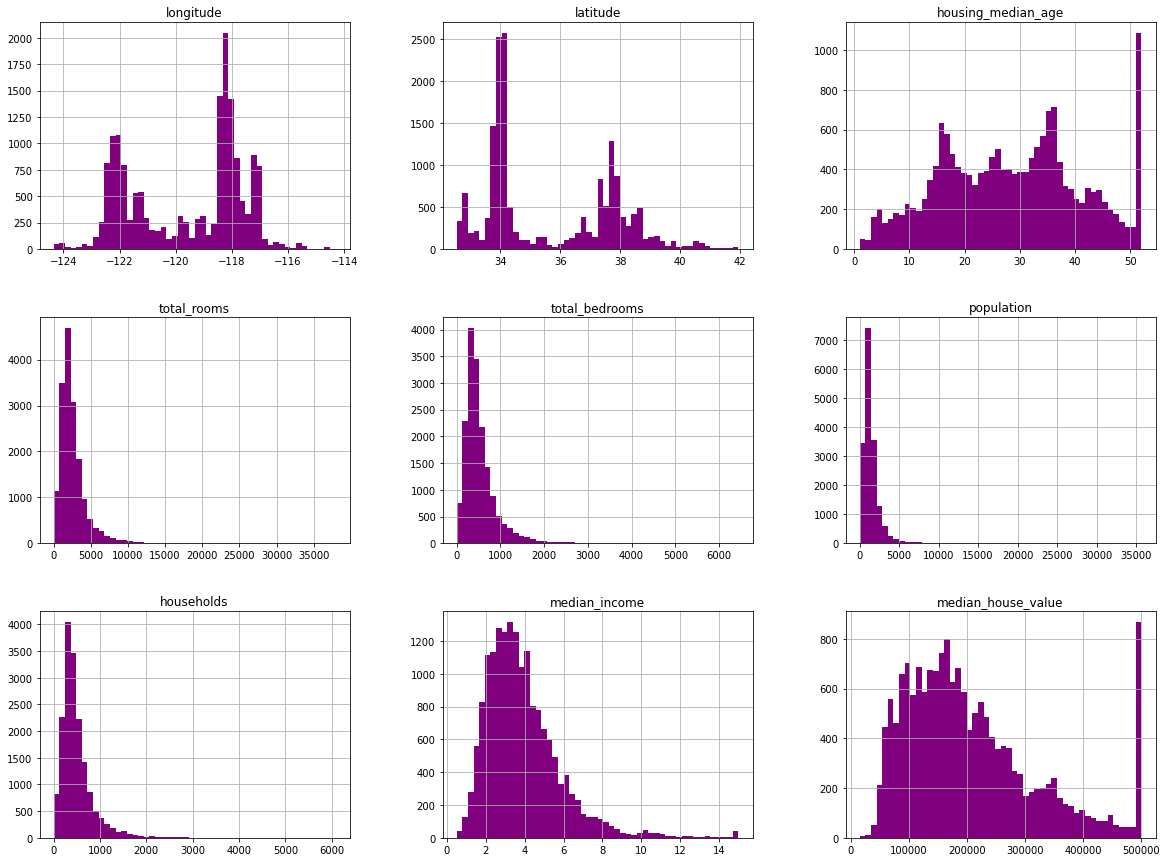

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50,figsize=(20,15), color='purple')
plt.show()

Text(0.5, 1.0, 'We expect high density points around Los Angeles and Central valley region')

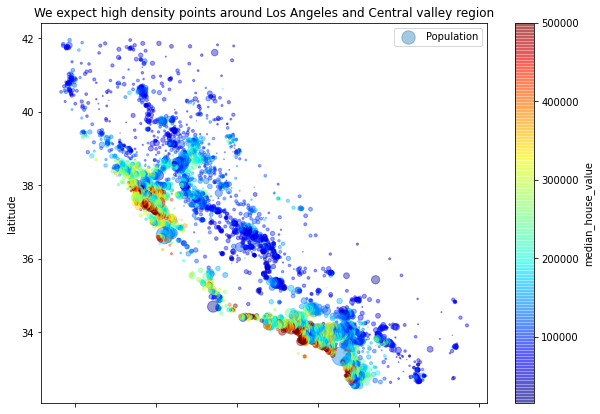

In [ ]:
train.plot(kind="scatter", x="longitude", y ="latitude", alpha = 0.4, s = train["population"]/100, label = "Population",
             figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar = True)
plt.legend()
plt.title('We expect high density points around Los Angeles and Central valley region')

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(train[attributes], figsize=(12, 8))

### Definition of COBRA

In [ ]:
class Dataset:
  """
    Dataset class for COBRA
  """
  def __init__(self,X_train,Y_train,X_test,Y_test):
    self.X_train = X_train
    self.Y_train = Y_train
    self.X_test = X_test
    self.Y_test = Y_test
  def split(self,ratio):
      # ratio = 0.5 si on veut séprarer en taille égale (si paire).
      k, = np.shape(self.Y_train)
      self.l = int(k*ratio)
      self.X_train_BM,self.X_train_cobra = self.X_train[0:self.l],self.X_train[self.l:]
      self.Y_train_BM,self.Y_train_cobra = self.Y_train[0:self.l],self.Y_train[self.l:]

In [ ]:
class Machine:
  """
    Machine class for COBRA. method fit/predict and score can be improve to adapt better to the different machine that we use as an input for cobra. For now, it only work with sckit learn regressor.
  """
  def __init__(self,name,m,isTrain=False):
    self.name = name
    self.isTrain = isTrain
    self.m = m
  def fit(self,X_train,Y_train):
    if self.isTrain == False:
      self.isTrain=True
      return self.m.fit(X_train,Y_train)
    else:
      raise Exception(f"Machine {self.name} has already been trained")
  def predict(self,X):
    return self.m.predict(X)
  def score(self,X,Y):
    return self.m.score(X,Y)

In [ ]:
class COBRA:
    """
      Main class of this project. Implement all the methods necessary to train and evaluate COBRA.

      Attribut:
        - nb_machines [int] : number of machine in COBRA
        - machines [dictionary] : dictionary of all machine in COBRA. self.machines["name"] = machine where machine is an object of Machine() class define before.
        - ratio [float] : ratio choosen for splitting the training set between D_l and D_k.
        - isCobraTrain [bool] : boolean that make sure COBRA is train before evaluating it.
        - score_training [dictionary] : dictionary that keep tracks of the performance of the different machines on the training set.
        - score_test [dictionary] : dictionary that keep tracks of the performance of the different machines on the test set.
        - epsilon [float] : the threshold that we see on the difinition of the COBRA estimator in equation (1)
        - preds [dictionary] : dictionary that keep track of the prediction made by the machines for a new dataset X.
        - ds [Dataset()] : the dataset that we use to evaluate and train COBRA   

      Methods:
        - __init__(self,ratio=0.5): Initialisation of the COBRA regressor.
        - setEpsilon(self,new_epsilon) : change epsilon to the value of new_epsilon
        - chooseEpsilon(self,X,Y) : choose epsilon for a specific dataset according to equation (2)
        - addMachine(self,name,m) : add a new machine to the dictionnary machines.
        - trainMachines(self,name='ALL') : train the machine "name". If name == 'ALL', train all the machine that are not yet trained.
        - pretrain(self,verbose=False) : pretrain COBRA by calculating the prediction of all the machines on the dataset D_l.
        - predict(self,X,verbose=False) : make prediction on the dataset X.
        - evaluate(self,metrics='R square') : evaluate the COBRA regressor on the test set. 

      yet to be implemented:
        - self.alpha [float] : parameters between 0 and 1 that tell us the proportion of the unanimity.
      
    """
    def __init__(self,ratio=0.5):
        self.nb_machines = 0
        self.machines = {}
        self.ratio = ratio
        self.isCobraTrain = False
        self.scores_training = {}
        self.scores_test = {}
        self.epsilon = 0
        self.preds = {}
        self.alpha = 1

    def setEpsilon(self,new_epsilon):
      self.epsilon = new_epsilon
    
    def setAlpha(self,new_alpha):
      self.alpha = new_alpha

    def chooseEpsilon(self,X,Y):
      max = - np.Infinity
      min = np.Infinity
      for name, machine in self.machines.items():
        temp_max = np.max(machine.predict(X))
        temp_min = np.min(machine.predict(X))
        if temp_max > max:
          max = temp_max
        if temp_min < min:
          min = temp_min
      self.epsilon = max - min 
    
    def hyperparamOpti(self,X,Y):
      max = - np.Infinity
      min = np.Infinity
      for name, machine in self.machines.items():
        temp_max = np.max(machine.predict(X))
        temp_min = np.min(machine.predict(X))
        if temp_max > max:
          max = temp_max
        if temp_min < min:
          min = temp_min
      l_alpha = [ 1/i for i in range(1,self.nb_machines+1) ]
      l_epsilon = np.linspace(10**(-300),max-min,20)
      best_epsilon = 0
      best_alpha = 0
      score = 0
      for i,alpha in enumerate(l_alpha):
        self.alpha = alpha
        for j,epsilon in enumerate(l_epsilon):
          print(f"Iteration number {i*len(l_epsilon)+j}/{len(l_alpha)*len(l_epsilon)} : \t epsilon = {self.epsilon} \t alpha = {self.alpha}")
          self.epsilon = epsilon
          try :
            precision,new_score = self.evaluate(X,Y,all=True)
            print(f'loss is {new_score}')
            print(f'precision is {precision}')
            if self.evaluate(X,Y,metrics='quadratic loss') > score:
              best_epsilon = epsilon
              best_alpha = alpha
          except (Exception):
            pass
      self.epsilon = best_epsilon
      self.alpha = best_alpha

    def addMachine(self,name,m):
      newM = Machine(name,m)
      self.machines[newM.name] = newM
      self.nb_machines+=1

    def addDataset(self,X_train,Y_train,X_test,Y_test):
      self.ds = Dataset(X_train,Y_train,X_test,Y_test)
      self.ds.split(self.ratio)

    def trainMachines(self,name='ALL'):
      if name=='ALL':
        for name,machine in self.machines.items():
          if machine.isTrain ==False:
            print(f"Training of machine {name}")
            machine.fit(self.ds.X_train_BM,self.ds.Y_train_BM)
            score_training = machine.score(self.ds.X_train_BM,self.ds.Y_train_BM)
            score_test = machine.score(self.ds.X_test,self.ds.Y_test)
            self.scores_training[name] = score_training
            self.scores_test[name] = score_test
            print(f"Machine {name} score on training set is:{score_training}")
            print(f"Machine {name} score on test set is:{score_test}")
            print("\n===================================================")

      else:
        if self.machines[name].isTrain == False:
          self.machines[name].fit(self.ds.X_train_BM,self.ds.Y_train_BM)
          self.machines[name] = machine
          score_training = machine.score(self.ds.X_train_BM,self.ds.Y_train_BM)
          score_test = machine.score(self.ds.X_test,self.ds.Y_test)
          self.scores_training[name] = score_training
          self.scores_test[name] = score_test
          print(f"Machine {name} score on training set is:{score_training}")
          print(f"Machine {name} score on test set is:{score_test}")
          print("\n===================================================")

        else:
          raise Exception("Machine déjà entrainer")

    def pretrain(self,verbose=False):
      for name,machine in self.machines.items():
        if machine.isTrain == False:
          raise Exception(f"Machine {name} is not train yet, you have to train it first")
      if verbose:
        print("All the machine have been train, we can now pretrain COBRA")
      if self.isCobraTrain:
        raise Exception("COBRA is already pretrain")
      for name,machine in self.machines.items():
        if verbose:
          print(f"Making prediction for machine {name}")
        self.preds[name] = machine.predict(self.ds.X_train_cobra)
      self.isCobraTrain = True

    def predict(self,X,verbose=False):
      if self.epsilon == 0:
        raise Exception ("Epsilon has not yet been choose")
      if self.isCobraTrain == False:
        raise Exception ("Cobra is not pretrain yet, please execute the method .pretrain_corbra() first")
      if verbose:
        print("COBRA is pretrain, we can now enter in the prediction phase")
      pred_x = {}
      res = np.ones(len(X))
      if verbose:
        print(f'size of the test set is : {len(X)}')
      size_intervalle = len(self.ds.X_train_cobra) //100
      res={}
      for name,machine in self.machines.items():
        if verbose:
          print(f"Prediction for {name}")
        cpt = 0
        pred = machine.predict(X)
        res_machine = []
        for i in range(len(self.ds.X_train_cobra)):
          if verbose: #useless au final
            if i % size_intervalle == 0:
              cpt+=1
              print("[" + "=" *cpt + " "*(100-cpt) + "]" + f"    example number = {i}/{len(self.ds.X_train_cobra)}")
          temp_array = np.ones(len(pred))*self.preds[name][i]
          #print(f"content of the res_machine.append{np.abs(pred - temp_array)}")
          #print(f"temp array {temp_array}")
          #print(f"np.where result is {np.where(np.abs(pred - temp_array) <= self.epsilon,1,0)}")
          res_machine.append(np.where(np.abs(pred - temp_array) <= self.epsilon,1,0))
        res[name]= np.array(res_machine)
      #print(f"res_machine is {res_machine}")
      final_res = np.ones((len(self.ds.X_train_cobra),len(X),self.nb_machines)) #modify by adding self.nb_machines
      for i,keys in enumerate(res):
        final_res[:,:,i] = res[keys]
      final_res = np.sum(final_res,axis=-1) #We sum on the number of machines.
      #print(final_res.shape)
      if verbose:
        print(f"Number of non zeros value is {np.count_nonzero(final_res)}")
        print(f"Number of 0 is {np.count_nonzero(final_res == 0)}")
      indices=[]
      normalisation_factor = []
      y_pred = np.zeros(len(X))
      #print(f"final res is: {final_res}")
      for j in range(len(final_res[0])):
        #print(f"np where result {np.where(final_res[:,j] >= self.alpha * self.nb_machines )}")
        indices.append(np.where(final_res[:,j] >= self.alpha * self.nb_machines )[0])
        #normalisation_factor.append(np.sum(final_res[:,j]))
        normalisation_factor.append(np.sum(np.where(final_res[:,j] >= self.alpha * self.nb_machines,0,1)))
        #print(np.sum(final_res[:,j]))
      #print(normalisation_factor[2])
      ##print(indices[0])
      for i in range(len(indices)):
        if normalisation_factor[i] ==0:
          raise Exception (f"Can't predict example {i} in the training set because no label is close enought")
        sum=0
        for indice in indices[i]:
          #print(indice)
          #print(self.ds.Y_train_cobra.iloc[indice])
          sum+= self.ds.Y_train_cobra.to_numpy()[indice]
        sum=sum/normalisation_factor[i]
        y_pred[i]=sum
      return(y_pred)

    def evaluate(self,X,y_true,all=True,metrics='R square'):
      if all:
        y_pred = self.predict(X,verbose=False)
        n = len(y_true)
        u = np.sum(np.power((y_true - y_pred),2))
        v = np.sum(np.power((y_true - np.mean(y_true)),2))
        precision = 1 - (u/v)
        loss = (1/n) * (np.sum(np.power(y_pred - y_true,2)))
        return precision,loss
      if metrics == 'R square':
        y_pred = self.predict(X,verbose=False)
        #print(type(y_pred))
        #print(y_pred)
        #print(type(y_true))
        #print(y_true)
        u = np.sum(np.power((y_true - y_pred),2))
        v = np.sum(np.power((y_true - np.mean(y_true)),2))
        return(1-u/v)
      if metrics.lower() == 'quadratic loss':
        y_pred = self.predict(X,verbose=False)
        n = len(y_true)
        return (1/n) * (np.sum(np.power(y_pred - y_true,2)))

      else:
        raise Exception("Metrics non implemented yet")


### Quick application

In [ ]:
# We shuffle the dataset (We see that de data was sorted by localisation so it is important to shuffle the dataset here)
train= train.sample(frac = 1)
test = test.sample(frac = 1)
#We split the dataset in 4 different array: X_train, Y_train,X_test,Y_test
#Training set
X_train,Y_train = train,train['median_house_value']
X_train = X_train.drop(['median_house_value'], axis = 1)
#Test set
X_test,Y_test = test,test['median_house_value']
X_test = X_test.drop(['median_house_value'], axis = 1)

In [ ]:
cobra = COBRA()

In [ ]:
cobra.addDataset(X_train,Y_train,X_test,Y_test)

In [ ]:
rf = RandomForestRegressor(random_state=0)
lasso = sk.linear_model.LassoLars(alpha=.1, normalize=False)
ridge = sk.linear_model.Ridge(alpha=.5)
#tr = tree.DecisionTreeClassifier()
#nbrs = NearestNeighbors()
#reg = linear_model.Lars(n_nonzero_coefs=1)
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [ ]:
cobra.addMachine("Random Forest",rf)
cobra.addMachine("LASSO",lasso)
cobra.addMachine("RIDGE",ridge)
#cobra.addMachine("CART",tr)
#cobra.addMachine("knn",nbrs)
#cobra.addMachine("lars",reg)
#cobra.addMachine("NeuralNet",clf)

In [ ]:
cobra.trainMachines()

Training of machine Random Forest
Machine Random Forest score on training set is:0.9730220147289966
Machine Random Forest score on test set is:0.7944310036380758

Training of machine LASSO
Machine LASSO score on training set is:0.6435156929576104
Machine LASSO score on test set is:0.6183941637971252

Training of machine RIDGE
Machine RIDGE score on training set is:0.6435156894929104
Machine RIDGE score on test set is:0.6183953521387684



In [ ]:
cobra.pretrain()

In [ ]:
#cobra.hyperparamOpti(cobra.ds.X_test,cobra.ds.Y_test)

In [ ]:
cobra.setAlpha(1)
print(cobra.alpha)

1


In [ ]:
cobra.setEpsilon(100000)
cobra.evaluate(cobra.ds.X_test,cobra.ds.Y_test)

(-0.9341887951587391, 24741753016.578026)

In [ ]:
cobra.machines["Random Forest"].score(cobra.ds.X_test,cobra.ds.Y_test)

0.7944310036380758

In [ ]:
cobra.machines["LASSO"].score(cobra.ds.X_test,cobra.ds.Y_test)

0.6191316166299037

In [ ]:
cobra.machines["RIDGE"].score(cobra.ds.X_test,cobra.ds.Y_test)

0.6191313080193286